<a href="https://colab.research.google.com/github/hansjang/Py_Radar/blob/main/%EB%8D%B0%EC%8B%B8%EB%9D%BC%EB%A9%B4Part6_P201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hansjang/Py_Radar.git

import shutil
shutil.move('Py_Radar/data', '/content/data')

# 폴더와 그 안의 모든 파일을 삭제
# !rm -rf /content/Py_Radar
# !rm -rf /content/data

Cloning into 'Py_Radar'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 185 (delta 6), reused 0 (delta 0), pack-reused 166 (from 1)
Receiving objects: 100% (185/185), 6.70 MiB | 7.70 MiB/s, done.
Resolving deltas: 100% (92/92), done.


'/content/data'

In [2]:
import numpy as np
import pandas as pd

c = pd.read_csv('/content/data/classification.csv')
display(c.head())

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


# SVC

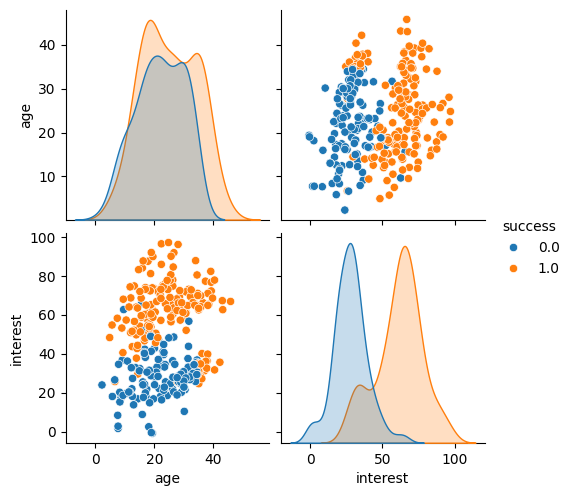

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(hue='success', data=c)

In [4]:
# 데이터 분할
from sklearn.model_selection import train_test_split

x = c[['age', 'interest']]
y = c['success']

train_x, test_x, train_y, test_y = train_test_split(x, y,
                                                    stratify = y,
                                                    train_size = 0.7,
                                                    random_state = 1)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(207, 2) (207,) (90, 2) (90,)


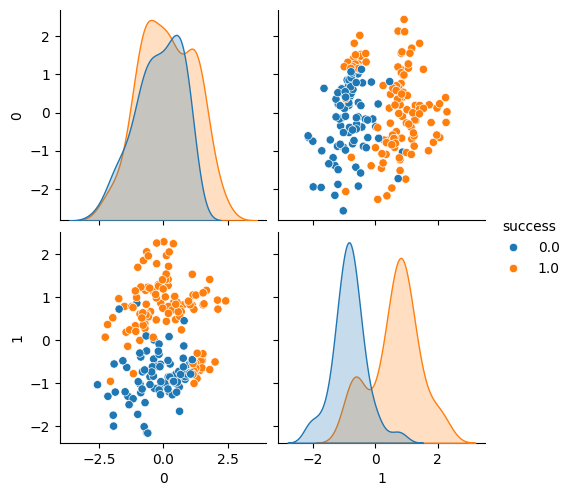

In [5]:
# 수치형변수 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)

sns.pairplot(data=pd.concat([pd.DataFrame(train_x),
                             train_y.reset_index(drop=True)],
                            axis = 1),
             hue = 'success')



In [6]:
# 모델 적용
from sklearn.svm import SVC

clf = SVC(C=0.5, random_state=45)
clf.fit(train_x, train_y)

SVC(C=0.5, random_state=45)

In [8]:
# 성능 평가
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

test_x_scal = scaler.transform(test_x)

pred = clf.predict(test_x_scal)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('\n')
print('정확도\t{}%'.format(round(test_acc*100, 2)))
print('정밀도\t{}%'.format(round(test_prc*100, 2)))
print('재현율\t{}%'.format(round(test_rcll*100, 2)))
print('F1\t{}%'.format(round(test_f1*100, 2)))

[[37  2]
 [ 2 49]]


정확도	95.56%
정밀도	96.08%
재현율	96.08%
F1	96.08%


# SVR

In [13]:
# 샘플데이터 생성하기
import numpy as np

x = np.sort(5 * np.random.rand(40, 1),axis = 0)
# 0(포함)~1(불포함) 균등분포에서 난수를 추출해서 ndarray를 생성
y = np.sin(x).ravel()
# x 값의 사인 값을 계산하여 1차원 배열로 생성

# print(x[0:6], '\n\n', y[0:10])

# 타겟데이터에 노이즈 추가하기
y[::5] += 3 * (0.5 - np.random.rand(8))
# y의 슬라이싱을 통해, 5개의 간격으로 선택된 요소들을 선택하여
# 0과 1 사이의 랜덤 값을 8개를 생성한 값들에서 0.5를 뺀 다음
# 3을 곱하여 값의 범위를 -1.5에서 1.5 사이로 조정함

# print(x.shape, y.shape)

(40, 1) (40,)


In [14]:
# 회귀 모델 적합시키기
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
# Radial Basis Function
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
# 선형회귀(linear)
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3,
               epsilon=0.1, coef0=1)
# 다항회귀(poly)

svr_rbf.fit(x, y)
svr_lin.fit(x, y)
svr_poly.fit(x, y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [16]:
# 성능 평가
rbf_pred = svr_rbf.predict(x)
lin_pred = svr_lin.predict(x)
poly_pred = svr_poly.predict(x)

from sklearn.metrics import mean_squared_error, mean_absolute_error

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['rbf', 'linear', 'polynomial']
evals = ['mse', 'mae', 'rmse']

results = pd.DataFrame(index=kernel, columns=evals)

for pred, nm in zip(preds, kernel) :
  mse = mean_squared_error(y, pred)
  mae = mean_absolute_error(y, pred)
  rmse = np.sqrt(mse)

  results.loc[nm]['mse'] = round(mse, 2)
  results.loc[nm]['mae'] = round(mae, 2)
  results.loc[nm]['rmse'] = round(rmse, 2)

display(results)
# RBF 모델은 MSE, MAE, RMSE 모두에서 가장 낮은 값을 기록해요.
# 따라서, RBF 모델이 가장 우수한 성능을 보이며, 가장 좋은 모델로 판단됩니다.

,mse,mae,rmse
rbf,0.16,0.23,0.41
linear,0.58,0.5,0.76
polynomial,0.17,0.22,0.42
